In [1]:
import torchvision
from torchvision import transforms, models
import torch
import torch.nn as nn
import torch.optim as optim

from NetworkAPI import NetworkAPI

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
# AlexNet potrzebuje obrazków w formacie wejściowym min. 227x227x3
data_transforms_alexnet = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.Resize(227),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(227),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets_alexnet = {x: torchvision.datasets.CIFAR10(root='./data', 
                                                  transform=data_transforms_alexnet[x]) for x in ['train', 'val']}

dataloaders_alexnet = {x: torch.utils.data.DataLoader(image_datasets_alexnet[x], 
                                              batch_size=64, 
                                              shuffle=True, 
                                              num_workers=4) for x in ['train', 'val']}

dataset_sizes_alexnet = {x: len(image_datasets_alexnet[x]) for x in ['train', 'val']}
class_names_alexnet = image_datasets_alexnet['train'].classes

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.RandomCrop(28, padding=4),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: torchvision.datasets.CIFAR10(root='./data', 
                                                  transform=data_transforms[x]) for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                              batch_size=256, 
                                              shuffle=True, 
                                              num_workers=4) for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

## Wykorzystanie gotowych architektur sieci neuronowych

Dla każdej gotowej architektury pokażemy jak zbiegają błędy i accuracy. Wykorzystamy sieci które są już wytrenowane jak również będziemy trenować je od zera.

W niektórych przypadkach wykresy mogą być niekompletne, spowodowane jest to niezapisaniem przez nas modeli i brakiem czasu na kolejne testowanie. Jednak wyniki zbiorcze przedstawione są na końcu tej części raportu.

Poniżej tabelka zawierająca przybliżone liczby parametrów potrzebnych do nauczenia w danej architekturze. Warto porównać te liczby ze skutecznością sieci i zobaczyć że nie zawsze ilość znaczy jakość.

| Rok powstania | Architektura | Ilość parametrów do nauczenia|
|---------------|--------------|------------------------------|
|2012| AlexNet | 60 milionów |
|2014| VGG16 | 138 milionów |
|2014| GoogleNet | 4 miliony |
|2015| ResNet152 | 12 milionów |
|2016| DenseNet121 | 5 milionów |

### AlexNet

Tą część zaczniemy od sieci która powstała w $2012$, a stworzył ją **Alex Krizhevsky**. 
W architekturze możemy zauważyć pewne elementy występujące w sieciach do dzisiaj, ale jednak w 2012 były nowością:
- wykorzystanie ReLU
- wykorzystanie metody Dropout do "wyłączania" losowych neuronów aby uniknąć overfittingu

**AlexNet** zawiera w sumie **5 warstw konwolucyjnych**, opowiedno z liczbą filtrów (64, 192, 384, 256, 256) o rozmiarach (11, 5, 3, 3, 3). Każda warstwa konwolucyjna jest zakończończona aktywacją **ReLU**, a dodatkowo po 1, 2 i 5 warstwie występuje **MaxPooling** zmiejszający rozmiar wstępnej macierzy ok. 2 razy. Na samym końcu, po linearyzacji, występują 3 warstwy liniowe, pomiędzy którymi występuje **Dropout** z poziomem $0.5$. Dosyć ciekawym rozwiązaniem jest wykorzystanie Dropoutu dopiero w końcowych warstwach

#### Pretrained AlexNet

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 30
Starting learning rate= 0.1
--------------------------------------------------------------------
| Epoch:   1 | Time: 126.40s | Train loss:  5.53 | Train acc: 56.22|
| Epoch:   1 | Time: 112.42s | Val loss:    7.09 | Val acc:   50.44|
--------------------------------------------------------------------
| Epoch:   6 | Time:  82.43s | Train loss:  3.60 | Train acc: 64.87|
| Epoch:   6 | Time:  81.28s | Val loss:    3.65 | Val acc:   68.93|
--------------------------------------------------------------------
| Epoch:  11 | Time:  81.77s | Train loss:  3.43 | Train acc: 65.55|
| Epoch:  11 | Time:  81.27s | Val loss:    8.80 | Val acc:   63.12|
--------------------------------------------------------------------
| Epoch:  16 | Time:  82.54s | Train loss:  3.25 | Train acc: 66.56|
| Epoch:  16 | Time:  84.67s | Val loss:    4.78 | Val acc:   58.38|
--------------------------------------------------------------------
| Epoch:  

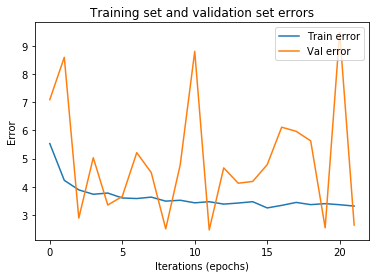

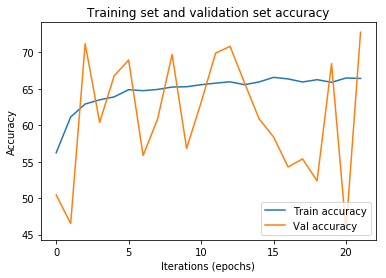

| Class                   | Train  | Test  |
--------------------------------------------
| Accuracy of: airplane   | 78.22% | 78.24%|
| Accuracy of: automobile | 93.78% | 93.70%|
| Accuracy of: bird       | 68.04% | 67.38%|
| Accuracy of: cat        | 6.34% | 6.76%|
| Accuracy of: deer       | 64.78% | 65.50%|
| Accuracy of: dog        | 95.96% | 95.80%|
| Accuracy of: frog       | 84.30% | 84.28%|
| Accuracy of: horse      | 74.66% | 74.52%|
| Accuracy of: ship       | 90.42% | 90.26%|
| Accuracy of: truck      | 71.12% | 70.96%|


In [4]:
alexnet = models.alexnet(pretrained=True)
for param in alexnet.parameters():
    param.requires_grad = False
    
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = alexnet.classifier[-1].in_features
alexnet.classifier[-1] = nn.Linear(num_ftrs, len(class_names_alexnet))

alexnet = alexnet.to(device)

palexnetAPI = NetworkAPI(alexnet, dataloaders_alexnet, 'alexnet_pretrained', optimizer=optim.SGD(alexnet.classifier[-1].parameters(), lr=0.1))
# palexnetAPI.load_checkpoint()
errors = palexnetAPI.train_loop(30,verbose_every_epoch=5)
palexnetAPI.plot_errors()
palexnetAPI.plot_accuracy()
palexnetAPI.class_accuracy(class_names_alexnet)

#### AlexNet from the beginning

====== HYPERPARAMETERS ======
starting epoch= 21
epochs to go= 9
Starting learning rate= 0.1
--------------------------------------------------------------------
| Epoch:  22 | Time: 170.10s | Train loss:  0.19 | Train acc: 93.65|
| Epoch:  22 | Time: 145.18s | Val loss:    0.12 | Val acc:   96.23|
--------------------------------------------------------------------
| Epoch:  25 | Time: 181.44s | Train loss:  0.16 | Train acc: 94.55|
| Epoch:  25 | Time:  97.73s | Val loss:    0.23 | Val acc:   92.69|
--------------------------------------------------------------------
| Epoch:  28 | Time: 174.63s | Train loss:  0.14 | Train acc: 95.23|
| Epoch:  28 | Time:  91.98s | Val loss:    0.09 | Val acc:   97.23|
--------------------------------------------------------------------
| Total time elapsed: 43 minutes 13 seconds 


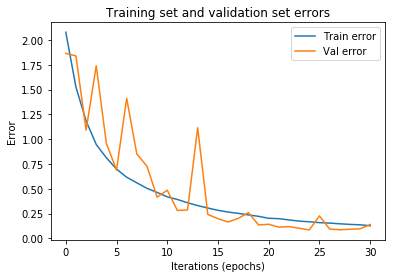

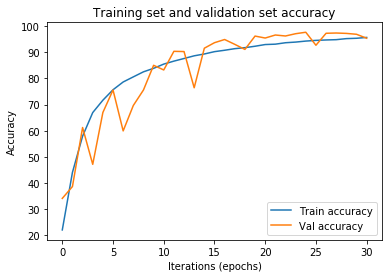

| Class                   | Train  | Test  |
--------------------------------------------
| Accuracy of: airplane   | 96.94% | 96.92%|
| Accuracy of: automobile | 97.16% | 97.34%|
| Accuracy of: bird       | 98.30% | 98.20%|
| Accuracy of: cat        | 97.12% | 97.36%|
| Accuracy of: deer       | 92.68% | 92.68%|
| Accuracy of: dog        | 92.78% | 92.16%|
| Accuracy of: frog       | 95.68% | 95.68%|
| Accuracy of: horse      | 92.94% | 92.82%|
| Accuracy of: ship       | 96.04% | 96.06%|
| Accuracy of: truck      | 94.42% | 94.50%|


In [4]:
alexnet = models.alexnet(pretrained=False)
num_ftrs = alexnet.classifier[-1].in_features
alexnet.classifier[-1] = nn.Linear(num_ftrs, len(class_names))
alexnet = alexnet.to(device)

alexnetAPI = NetworkAPI(alexnet, dataloaders_alexnet, 'alexnet', optimizer=optim.SGD(alexnet.parameters(), lr=0.1))
alexnetAPI.load_checkpoint()
errors = alexnetAPI.train_loop(9,verbose_every_epoch=3)
alexnetAPI.plot_errors()
alexnetAPI.plot_accuracy()
alexnetAPI.class_accuracy(class_names_alexnet)

### VGG
Powstała w $2014$ na uniwersytecie w Oxfordzie, podstawowa różnica między poprzednikami to **wykorzystanie dużej ilości filtrów małego rozmiaru**. Np. zamiast korzystać z 3 filtrów o rozmiarze 512x512, wykorzystywano 512 filtrów o rozmiarze 3x3, co daje bardzo podobny rezultat. 
Z powodu ogromnej ilości filtrów w aż **16 warstwach konwolucyjnych** sieć wymaga ogromnej mocy obliczeniowej. Do przykładowego konkursu w którym sieć zdobyła pierwsze miejsce w 2014, była trenowana ok 2-3 tygodni na 4 najnowszych kartach graficznych.

#### Pretrained VGG16

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 30
Starting learning rate= 0.1
--------------------------------------------------------------------
| Epoch:   1 | Time:  50.45s | Train loss:  3.24 | Train acc: 44.27|
| Epoch:   1 | Time:  53.43s | Val loss:    2.85 | Val acc:   48.28|
--------------------------------------------------------------------
| Epoch:   6 | Time:  54.22s | Train loss:  2.74 | Train acc: 49.54|
| Epoch:   6 | Time:  48.91s | Val loss:    2.05 | Val acc:   54.64|
--------------------------------------------------------------------
| Epoch:  11 | Time:  52.29s | Train loss:  2.73 | Train acc: 50.41|
| Epoch:  11 | Time:  48.45s | Val loss:    2.08 | Val acc:   51.87|
--------------------------------------------------------------------
| Total time elapsed: 22 minutes 18 seconds 
--------------------------------------------------------------------
| Total time elapsed: 22 minutes 18 seconds 


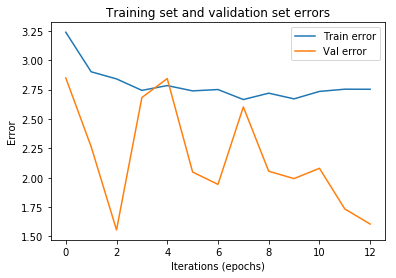

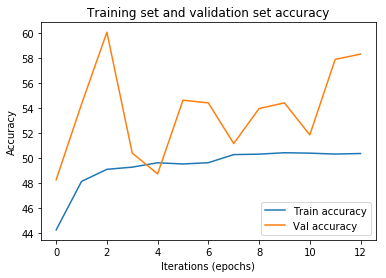

| Class                   | Train  | Test  |
--------------------------------------------
| Accuracy of: airplane   | 21.72% | 21.74%|
| Accuracy of: automobile | 64.20% | 63.68%|
| Accuracy of: bird       | 58.52% | 58.80%|
| Accuracy of: cat        | 34.84% | 34.52%|
| Accuracy of: deer       | 63.46% | 63.16%|
| Accuracy of: dog        | 70.38% | 70.46%|
| Accuracy of: frog       | 43.38% | 44.46%|
| Accuracy of: horse      | 72.04% | 72.40%|
| Accuracy of: ship       | 79.88% | 80.20%|
| Accuracy of: truck      | 73.64% | 73.80%|


In [6]:
vgg16 = models.vgg16(pretrained=True)
for param in vgg16.parameters():
    param.requires_grad = False
    
num_ftrs = vgg16.classifier[-1].in_features
vgg16.classifier[-1] = nn.Linear(num_ftrs, len(class_names))
vgg16 = vgg16.to(device)

p_vgg16API = NetworkAPI(vgg16, dataloaders, 'pretrained_vgg16', optimizer=optim.SGD(vgg16.classifier[-1].parameters(), lr=0.1))
# p_vgg16API.load_checkpoint()
errors = p_vgg16API.train_loop(30,verbose_every_epoch=5)
p_vgg16API.plot_errors()
p_vgg16API.plot_accuracy()
p_vgg16API.class_accuracy(class_names)

#### VGG16 from the beginning

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 30
Starting learning rate= 0.1
--------------------------------------------------------------------
| Epoch:   1 | Time:  97.55s | Train loss:  2.23 | Train acc: 14.81|
| Epoch:   1 | Time:  35.17s | Val loss:    2.18 | Val acc:   12.75|
--------------------------------------------------------------------
| Epoch:   6 | Time: 219.04s | Train loss:  1.36 | Train acc: 50.74|
| Epoch:   6 | Time:  68.27s | Val loss:    1.27 | Val acc:   54.16|
--------------------------------------------------------------------
| Epoch:  11 | Time: 177.27s | Train loss:  0.83 | Train acc: 71.48|
| Epoch:  11 | Time:  54.40s | Val loss:    0.78 | Val acc:   73.51|
--------------------------------------------------------------------
| Epoch:  16 | Time: 139.59s | Train loss:  0.50 | Train acc: 83.16|
| Epoch:  16 | Time:  47.89s | Val loss:    0.79 | Val acc:   73.82|
--------------------------------------------------------------------
| Epoch:  

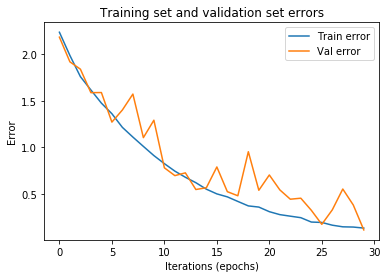

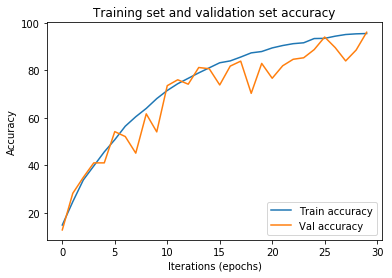

| Class                   | Train  | Test  |
--------------------------------------------
| Accuracy of: airplane   | 98.62% | 98.62%|
| Accuracy of: automobile | 98.88% | 98.82%|
| Accuracy of: bird       | 95.40% | 95.26%|
| Accuracy of: cat        | 97.02% | 96.88%|
| Accuracy of: deer       | 98.80% | 98.70%|
| Accuracy of: dog        | 89.98% | 90.24%|
| Accuracy of: frog       | 95.18% | 95.20%|
| Accuracy of: horse      | 90.44% | 90.24%|
| Accuracy of: ship       | 98.34% | 98.16%|
| Accuracy of: truck      | 97.68% | 98.06%|


In [4]:
vgg16 = models.vgg16(pretrained=False)
num_ftrs = vgg16.classifier[-1].in_features
vgg16.classifier[-1] = nn.Linear(num_ftrs, len(class_names))
vgg16 = vgg16.to(device)

vgg16API = NetworkAPI(vgg16, dataloaders, 'vgg16', optimizer=optim.SGD(vgg16.parameters(), lr=0.1))
errors = vgg16API.train_loop(30,verbose_every_epoch=5)
vgg16API.plot_errors()
vgg16API.plot_accuracy()
vgg16API.class_accuracy(class_names)

### GoogleNet

Po sukcesie sieci **VGG** zaczęto zastanwiać się co zrobić, aby zachować skuteczność sieci, ale zmniejszyć ilość parametrów potrzebnych do wyuczenia. Christian Szegedy z Google wpadł na 2 pomysły:
- Wykorzystanie metody typu **Bottleneck** (w połączeniu z równoległym uczeniem) (**Inception Layer**)
- Zrezygnowanie z całkowicie połączonych warstw i zastąpienie ich inną metodą pozwalającą przekształcić mapy aktywacji na klasyfikacje **AvgPooling**

Metoda **Inception** polega na rozdzieleniu warstwy na kilka mniejszych uczonych w tym samym czasie, dodatkowo każda z mniejszych warstw ma inne rozmiary filtrów, a nawet typów warstw. Na sam koniec warstwy są składane w jeden output. Sama metoda **Inception** nie zmniejsza jednak liczby parametrów do nauczenia.

<img src="naive_inception.PNG" width="450" height="1" class="center">

<hr>

Metoda **Bottleneck** polega na zmniejszeniu ilości parametrów w danych warstwach. Jest to rozszerzenie metody **Network in Network**, polegającej na wykorzystaniu konwolucji o rozmiarze $1x1$ do zredukowania liczby filtrów w mapie (obrazku) na których chcemy wykonać kolejną konwolucję. Dodatkowo metoda **Network in Network** pozwala na wykorzystanie nieliniowej aproksymacji przy detekcji kształtów. Podstawowa konwolucja zakłada, że ukryte pojęcia są liniowo rozdzielalne. Ale linia prosta może nie zawsze pasować. Dlatego wykorzystanie tej metody jest dosyć popularne w dzisiejszych architekturach.

*Przykład:*
Wyobraźmy sobie że do warstwy konwolucyjnej wchodzą dane o głębokości 256 map aktywacji i tyle samo warstw chcemy uzyskać na wyjściu po przetworzeniu ich filtrami konwolucyjnymi o wymiarze $3x3$. Wychodzi na to, że musielibyśmy wykonać $256*256*3*3$~$590k$ operacji. 
Teraz zamiast od razu wykonywać operację konwolucji $3x3$, wykonajmy zmniejszenie ilości wejściowych warstw o np. 4 razy, czyli do liczby 64 warstw:
- Zmniejszenie ilości warstw (konwolucja $1x1$): $256*64*1*1$~$16k$
- Prawidłowa warstwa (konwolucja $3x3$): $64*64*3*3$~$36k$
- Zwiększenie ilości warstw (konwolucja $1x1$): $64*256*1*1$~$16k$

Co w sumie daje nam ok. $70k$ operacji do wykonania. To prawie 10 razy mniej niż mielibyśmy wczesniej.

Powodem sukcesu jest to, że wejściowe mapy aktywacji są skorelowane, a zatem można pozbyć się redundancji w danych. Następnie po nałożeniu odpowiedniego filtra, mapy aktywacji można ponownie rozwinąć w sensowną kombinację dla następnej warstwy.

Dzięki temu  wykonanie metody incepcji będzie o wiele mniej kosztowne obliczeniowo.

Na obrazku poniżej widzimy przykładowy segment z sieci GoogleNet.

<img src="inception.PNG" width="450" height="1" class="center">

<hr>

Metoda **Global Average Pooling** pozwala na zmniejszenie ilości parametrów w ostatniej warstwie sieci, kiedy zamieniamy mapy aktywacji na 1 wymiarową warstę (*fully connected layer*). Dzięki zmniejszeniu liczby parametrów zmiejszamy szansę na overfitting, jak również zmniejszamy wymagania obliczeniowe. Na obrazku poniżej schemat działania **Global Average Poolingu**:

<img src="gap.PNG" width="450" height="1" class="center">


Niestety w aktualnej wersji Pytorcha nie ma zaimplementowanej oryginalnej sieci GoogleNet, więc posłużymy się jej ulepszoną wersją czyli **Inception_v3**.

#### Pretrainged Inception_v3 (GoogleNet)

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 2
Starting learning rate= 0.1
--------------------------------------------------------------------
| Epoch:   1 | Time: 547.33s | Train loss:  1.06 | Train acc: 64.48|
| Epoch:   1 | Time: 529.08s | Val loss:    0.93 | Val acc:   68.66|
--------------------------------------------------------------------
| Epoch:   2 | Time: 557.46s | Train loss:  0.97 | Train acc: 68.31|
| Epoch:   2 | Time: 500.15s | Val loss:    0.87 | Val acc:   70.70|
--------------------------------------------------------------------
| Total time elapsed: 35 minutes 34 seconds 


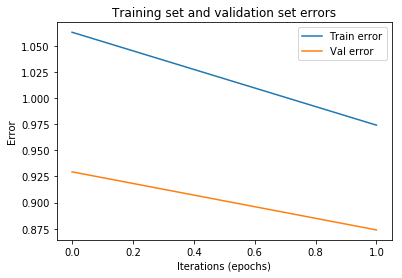

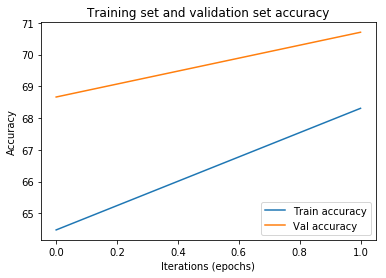

| Class                   | Train  | Test  |
--------------------------------------------
| Accuracy of: airplane   | 78.70% | 78.74%|
| Accuracy of: automobile | 96.16% | 96.56%|
| Accuracy of: bird       | 60.06% | 59.72%|
| Accuracy of: cat        | 47.62% | 47.92%|
| Accuracy of: deer       | 50.78% | 51.32%|
| Accuracy of: dog        | 83.74% | 83.90%|
| Accuracy of: frog       | 90.70% | 91.02%|
| Accuracy of: horse      | 48.48% | 48.06%|
| Accuracy of: ship       | 73.78% | 73.76%|
| Accuracy of: truck      | 75.80% | 76.04%|


In [7]:
googlenet = models.inception_v3(pretrained=True)
for param in googlenet.parameters():
    param.requires_grad = False
googlenet.aux_logits=False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = googlenet.fc.in_features
googlenet.fc = nn.Linear(num_ftrs, len(class_names_alexnet))
googlenet = googlenet.to(device)

p_googlenetAPI = NetworkAPI(googlenet, dataloaders_alexnet, 'pretrained_googlenet', optimizer=optim.SGD(googlenet.fc.parameters(), lr=0.1))
errors = p_googlenetAPI.train_loop(2,verbose_every_epoch=1)
p_googlenetAPI.plot_errors()
p_googlenetAPI.plot_accuracy()
p_googlenetAPI.class_accuracy(class_names_alexnet)

### ResNet

Jeżeli osiągneliśmy już wysoką skuteczność i mniejszą złożoność obliczeniową jak w przypadku GoogleNet, to czemu nie stworzyć podobnej architektury tylko że z odpowiednio większą liczbą warstw? Otóż okazuje się, że nie rozwiązuje to problemu. W pewnym momencie sieć przestaje polepszać swoje wyniki.

<img src="resnet_1.PNG" width="600" height="150" class="center">

Na powyższym obrazku widać, że na przykładowym zbiorze danych sieć o 56 warstwach dostarcza gorsze wyniki, niż ta o warstwach 20. Teoretycznie mogłoby być to spowodowane overfittingiem głębszej sieci, ale wtedy chociaż błąd zbioru treningowego powinien spaść poniżej poziomu sieci dla 20 warstw.

Okazuje się że problemem jest **zanikający gradient**. W końcu im głębszą mamy sieć tym więcej obliczeń wstecz musimy wykonać aby dokonać nauczenia parametrów podczas algorytmu propagacji wstecznej. Jeżeli sieć jest bardzo głęboka i pomnożymy wiele elementów, które są mniejsze niż 1, wynik końcowy będzie bardzo mały. Gdy zbliżamy się do początkowych warstw w głębokiej architekturze, gradient ma już bardzo niską wartość, w niektórych przypadkach jest nawet zerowy, co oznacza, że w ogóle nie aktualizaujemy wcześniejszych parametrów.

Jak sobie z tym poradzić? Na to pytanie odpowiedź znalazło kilka osób z firmy Microsoft. Architektura sieci **ResNet** polega na złożeniu widocznych poniżej bloczków:

<img src="residual_block.PNG" width="200" height="50" class="center">

Dzięki dodaniu do wyniku macierzy jednostkowiej, gradient zostaje zachowany i nie ma możliwości aby zbliżył się do $0$. Dzięki temu rozwiązaniu nawet w przypadku bardzo głębokiej sieci, wagi są aktualizowane w początkowych warstwach na podstawie zachowanego gradientu.

#### Pretrained ResNet

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 30
Starting learning rate= 0.1
--------------------------------------------------------------------
| Epoch:   1 | Time:  85.75s | Train loss:  3.55 | Train acc: 32.51|
| Epoch:   1 | Time:  95.31s | Val loss:    2.82 | Val acc:   40.36|
--------------------------------------------------------------------
| Epoch:   6 | Time:  86.45s | Train loss:  2.33 | Train acc: 43.42|
| Epoch:   6 | Time:  89.95s | Val loss:    3.54 | Val acc:   36.65|
--------------------------------------------------------------------
| Epoch:  11 | Time:  85.22s | Train loss:  2.20 | Train acc: 45.86|
| Epoch:  11 | Time:  94.03s | Val loss:    1.96 | Val acc:   45.94|
--------------------------------------------------------------------
| Epoch:  16 | Time:  85.46s | Train loss:  2.15 | Train acc: 46.35|
| Epoch:  16 | Time:  90.32s | Val loss:    2.35 | Val acc:   45.55|
--------------------------------------------------------------------
| Epoch:  

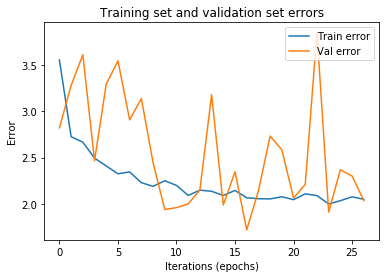

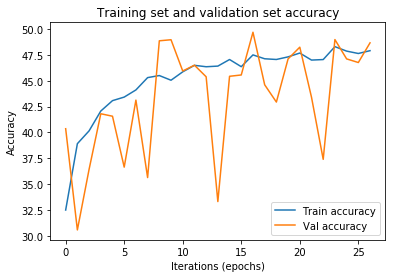

| Class                   | Train  | Test  |
--------------------------------------------
| Accuracy of: airplane   | 63.32% | 62.74%|
| Accuracy of: automobile | 5.04% | 5.10%|
| Accuracy of: bird       | 39.74% | 39.48%|
| Accuracy of: cat        | 77.42% | 77.46%|
| Accuracy of: deer       | 50.74% | 50.88%|
| Accuracy of: dog        | 6.50% | 6.88%|
| Accuracy of: frog       | 48.16% | 47.60%|
| Accuracy of: horse      | 62.32% | 61.66%|
| Accuracy of: ship       | 60.14% | 59.34%|
| Accuracy of: truck      | 76.22% | 75.42%|


In [5]:
p_resnet152 = models.resnet152(pretrained=True)
for param in p_resnet152.parameters():
    param.requires_grad = False
p_resnet152    
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = p_resnet152.fc.in_features
p_resnet152.fc = nn.Linear(num_ftrs, len(class_names))
p_resnet152 = p_resnet152.to(device)

p_resnet152API = NetworkAPI(p_resnet152, dataloaders, 'pretrained_resnet152', optimizer=optim.SGD(p_resnet152.fc.parameters(), lr=0.1))
errors = p_resnet152API.train_loop(30,verbose_every_epoch=5)
p_resnet152API.plot_errors()
p_resnet152API.plot_accuracy()
p_resnet152API.class_accuracy(class_names)

#### ResNet from the beggining

====== HYPERPARAMETERS ======
starting epoch= 21
epochs to go= 9
Starting learning rate= 0.1
--------------------------------------------------------------------
| Epoch:  22 | Time: 176.36s | Train loss:  0.88 | Train acc: 69.15|
| Epoch:  22 | Time:  82.10s | Val loss:    3.69 | Val acc:   66.40|
--------------------------------------------------------------------
| Epoch:  25 | Time: 196.36s | Train loss:  0.77 | Train acc: 73.18|
| Epoch:  25 | Time:  80.21s | Val loss:    4.60 | Val acc:   67.30|
--------------------------------------------------------------------
| Epoch:  28 | Time: 188.80s | Train loss:  0.68 | Train acc: 76.15|
| Epoch:  28 | Time:  79.82s | Val loss:    1.55 | Val acc:   71.76|
--------------------------------------------------------------------
| Total time elapsed: 40 minutes 32 seconds 


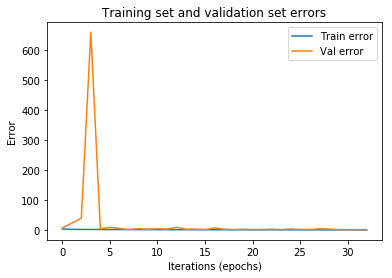

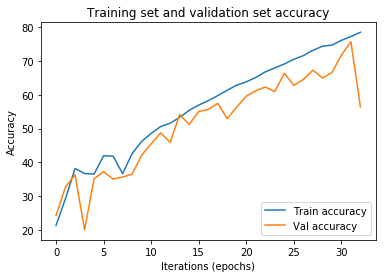

| Class                   | Train  | Test  |
--------------------------------------------
| Accuracy of: airplane   | 92.08% | 92.20%|
| Accuracy of: automobile | 63.42% | 63.82%|
| Accuracy of: bird       | 55.04% | 54.70%|
| Accuracy of: cat        | 39.32% | 38.72%|
| Accuracy of: deer       | 17.48% | 16.66%|
| Accuracy of: dog        | 59.12% | 58.92%|
| Accuracy of: frog       | 52.98% | 53.26%|
| Accuracy of: horse      | 51.84% | 52.16%|
| Accuracy of: ship       | 54.40% | 54.62%|
| Accuracy of: truck      | 79.46% | 79.48%|


In [4]:
resnet152 = models.resnet152(pretrained=False)
num_ftrs = resnet152.fc.in_features
resnet152.fc = nn.Linear(num_ftrs, len(class_names))
resnet152 = resnet152.to(device)

resnet152API = NetworkAPI(resnet152, dataloaders, 'resnet152', optimizer=optim.SGD(resnet152.parameters(), lr=0.1))
resnet152API.load_checkpoint()

errors = resnet152API.train_loop(9,verbose_every_epoch=3)
resnet152API.plot_errors()
resnet152API.plot_accuracy()
resnet152API.class_accuracy(class_names)

### DenseNet

Najnowsza architektura w tym zestawieniu pochodzi z Facebook AI Research (FAIR) i zdobyła najlepszą pracę na najbardziej prestiżowej konferencji poświęconej wizji komputerowej w 2017 roku. Podobnie jak wcześniej GoogLeNet i ResNet, DenseNet wprowadził nowy blok zwany **Dense Block**.

**Dense Block** posuwają koncepcję ResNet o krok dalej i do aktualnej warstwy podłączją wszystkie poprzednie! Aby warstwy były ze sobą kompatybilne, stosujemy różne operacje znane z poprzednich architektur. Zaletą tego podejścia jest to że wykorzystujemy parametry po kilka razy i eliminujemy problem znikającego gradientu.

<img src="dense_net.PNG" width="600" height="150" class="center">


#### Pretrained DenseNet

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 30
Starting learning rate= 0.1
--------------------------------------------------------------------
| Epoch:   1 | Time:  29.61s | Train loss:  1.88 | Train acc: 41.08|
| Epoch:   1 | Time:  41.58s | Val loss:    1.88 | Val acc:   48.10|
--------------------------------------------------------------------
| Epoch:   6 | Time:  30.51s | Train loss:  1.56 | Train acc: 49.50|
| Epoch:   6 | Time:  38.38s | Val loss:    1.65 | Val acc:   48.83|
--------------------------------------------------------------------
| Epoch:  11 | Time:  26.51s | Train loss:  1.52 | Train acc: 50.34|
| Epoch:  11 | Time:  33.89s | Val loss:    1.74 | Val acc:   44.83|
--------------------------------------------------------------------
| Epoch:  16 | Time:  26.59s | Train loss:  1.49 | Train acc: 51.14|
| Epoch:  16 | Time:  33.77s | Val loss:    1.71 | Val acc:   46.99|
--------------------------------------------------------------------
| Epoch:  

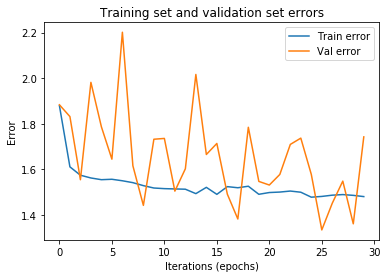

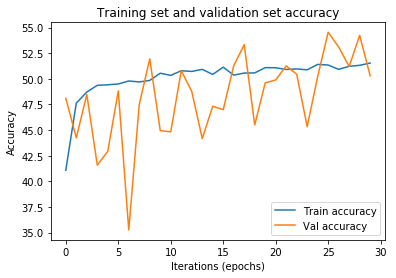

| Class                   | Train  | Test  |
--------------------------------------------
| Accuracy of: airplane   | 41.36% | 42.02%|
| Accuracy of: automobile | 66.20% | 66.76%|
| Accuracy of: bird       | 0.96% | 0.76%|
| Accuracy of: cat        | 10.84% | 9.96%|
| Accuracy of: deer       | 34.10% | 33.88%|
| Accuracy of: dog        | 67.42% | 67.80%|
| Accuracy of: frog       | 87.18% | 87.00%|
| Accuracy of: horse      | 59.88% | 59.44%|
| Accuracy of: ship       | 75.92% | 75.78%|
| Accuracy of: truck      | 60.26% | 59.68%|


In [6]:
p_densenet121 = models.densenet121(pretrained=True)
for param in p_densenet121.parameters():
    param.requires_grad = False
    
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = p_densenet121.classifier.in_features
p_densenet121.classifier = nn.Linear(num_ftrs, len(class_names))
p_densenet121 = p_densenet121.to(device)

p_densenet121API = NetworkAPI(p_densenet121, dataloaders, 'pretrained_densenet121', optimizer=optim.SGD(p_densenet121.classifier.parameters(), lr=0.1))
errors = p_densenet121API.train_loop(30,verbose_every_epoch=5)
p_densenet121API.plot_errors()
p_densenet121API.plot_accuracy()
p_densenet121API.class_accuracy(class_names)

#### DenseNet from the beggining

====== HYPERPARAMETERS ======
starting epoch= 0
epochs to go= 20
Starting learning rate= 0.1
--------------------------------------------------------------------
| Epoch:   1 | Time:  67.11s | Train loss:  1.65 | Train acc: 39.58|
| Epoch:   1 | Time:  34.50s | Val loss:    1.77 | Val acc:   39.77|
--------------------------------------------------------------------
| Epoch:   6 | Time:  67.55s | Train loss:  0.78 | Train acc: 72.23|
| Epoch:   6 | Time:  34.84s | Val loss:    0.98 | Val acc:   65.98|
--------------------------------------------------------------------
| Epoch:  11 | Time:  66.94s | Train loss:  0.49 | Train acc: 82.85|
| Epoch:  11 | Time:  34.93s | Val loss:    0.66 | Val acc:   77.46|
--------------------------------------------------------------------
| Epoch:  16 | Time:  67.78s | Train loss:  0.30 | Train acc: 89.54|
| Epoch:  16 | Time:  34.80s | Val loss:    0.43 | Val acc:   85.06|
--------------------------------------------------------------------
| Total ti

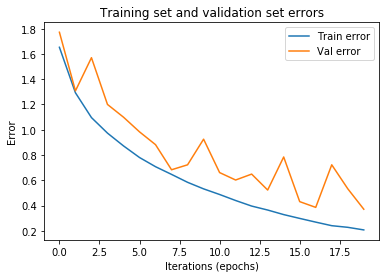

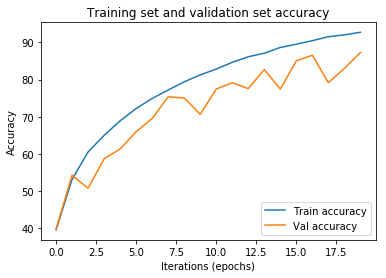

| Class                   | Train  | Test  |
--------------------------------------------
| Accuracy of: airplane   | 94.28% | 94.18%|
| Accuracy of: automobile | 94.12% | 94.44%|
| Accuracy of: bird       | 88.80% | 88.26%|
| Accuracy of: cat        | 81.50% | 81.54%|
| Accuracy of: deer       | 71.64% | 71.42%|
| Accuracy of: dog        | 88.38% | 88.52%|
| Accuracy of: frog       | 88.30% | 88.18%|
| Accuracy of: horse      | 94.06% | 93.82%|
| Accuracy of: ship       | 94.00% | 94.50%|
| Accuracy of: truck      | 78.54% | 78.18%|


In [7]:
densenet121 = models.densenet121(pretrained=False)

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = densenet121.classifier.in_features
densenet121.classifier = nn.Linear(num_ftrs, len(class_names))
densenet121 = densenet121.to(device)

densenet121API = NetworkAPI(densenet121, dataloaders, 'densenet121', optimizer=optim.SGD(densenet121.parameters(), lr=0.1))
errors = densenet121API.train_loop(20,verbose_every_epoch=5)
densenet121API.plot_errors()
densenet121API.plot_accuracy()
densenet121API.class_accuracy(class_names)

### Wnioski:


Testowanie różnych gotowych sieci, które na przestrzeni lat wygrywały konkursy na klasyfikację zdjęć ImageNet daje oczekiwane rezultaty. Im architektura jest nowsza i bardziej zaawansowana - daje lepsze rezultaty. Poniżej wklejamy tabelkę z wynikami accuracy dla poszczególnych sieci.

<img src="table_acc.PNG" width="600" height="150" class="center">

**Oprócz tego kilka obserwacji, które warto zanotować na przyszłość:**

- Wymiar i rodzaj danych wejściowych może mieć duże znaczenie dla skuteczności modeli w których korzystamy z już wyuczonych wag.
- ResNet prawdopodobnie wymaga nauki na większej liczbie epok, spowodowane to jest głębokością tej architektury
- Najlepsze wyniki daje DenseNet, ponieważ jest to najbardziej zaawansowana architektura.
